In [8]:
import pandas as pd
df_FIBA = pd.read_csv("FIBA_Play_Counts.csv", encoding='latin-1')
df_FIBA.rename(columns={"Unnamed: 0": "Player"}, inplace=True)
df_FIBA['Source'] = 'FIBA'
df_FIBA.head()

,Player,P&R Ball Handler,Spot-Up,Transition,ISO,Post-Up,P&R Roll Man,Cut,Offensive Rebound,Off Screen,Hand Off,Total,Source
0,Ricky Rubio,284,121,64,20,0,0,9,25,7,16,546,FIBA
1,Luis Scola,0,122,105,19,304,167,125,97,20,1,960,FIBA
2,Rudy Fernandez,109,103,54,33,0,1,20,37,36,12,405,FIBA
3,Juancho Hernangomez,2,53,25,5,5,8,26,35,13,1,173,FIBA
4,Pierre Oriola,0,21,10,0,3,8,18,38,1,1,100,FIBA


In [9]:
df_NBA = pd.read_csv("NBA_Play_Counts.csv", encoding='latin-1')
df_NBA.rename(columns={"Unnamed: 0": "Player"}, inplace=True)
df_NBA['Source'] = 'NBA'
df_NBA.head()

,Player,P&R Ball Handler,Spot-Up,Transition,ISO,Post-Up,P&R Roll Man,Cut,Offensive Rebound,Off Screen,Hand Off,Total,Source
0,Dwyane Wade,4872,818,1207,1149,1232,26,484,437,396,364,10985,NBA
1,Danny Green,751,2193,1168,127,42,21,212,350,512,282,5658,NBA
2,Lebron James,863,199,477,612,514,64,121,92,86,7,3035,NBA
3,Kawhi Leonard,3109,1734,1487,1471,1223,60,310,605,523,463,10985,NBA
4,Tim Duncan,6,280,169,98,1235,757,635,556,52,13,3801,NBA


In [29]:
df = pd.concat([df_FIBA, df_NBA]).reset_index()
s = df['Player'].value_counts()
df[df['Player'].isin(s[s>=2].index)]

,index,Player,P&R Ball Handler,Spot-Up,Transition,ISO,Post-Up,P&R Roll Man,Cut,Offensive Rebound,Off Screen,Hand Off,Total,Source
0,0,Ricky Rubio,284,121,64,20,0,0,9,25,7,16,546,FIBA
1,1,Luis Scola,0,122,105,19,304,167,125,97,20,1,960,FIBA
2,2,Rudy Fernandez,109,103,54,33,0,1,20,37,36,12,405,FIBA
6,6,Patricio Garino,28,80,73,6,12,0,16,20,7,7,249,FIBA
7,7,Marc Gasol,2,50,33,14,166,115,52,30,5,2,469,FIBA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4533,1660,Luciano Parodi,10,1,1,3,0,0,0,0,1,1,17,NBA
4536,1663,Lucas Dias,0,4,1,0,5,1,0,1,1,0,13,NBA
4537,1664,Carlos Schattmann,6,0,1,0,0,0,0,0,4,0,11,NBA
4538,1665,Lucas Cipolini,0,3,2,0,2,0,0,4,0,0,11,NBA


In [30]:
play_types = ['P&R Ball Handler', 'Spot-Up', 'Transition', 'ISO', 'Post-Up', 'P&R Roll Man', 'Cut', 'Offensive Rebound', 'Off Screen', 'Hand Off']
for p in play_types:
    df['% ' + p] = df[p] / df['Total']

In [39]:
df = df[df['Total'] >= 50].sort_values('Total', ascending=False)
filt_df = df[['% ' + p for p in play_types]].copy()
filt_df

,% P&R Ball Handler,% Spot-Up,% Transition,% ISO,% Post-Up,% P&R Roll Man,% Cut,% Offensive Rebound,% Off Screen,% Hand Off
3346,0.000000,0.475308,0.000000,0.000000,0.000000,0.401797,0.122895,0.000000,0.000000,0.000000
3029,0.423124,0.044817,0.130192,0.302092,0.025178,0.001619,0.009969,0.021855,0.016274,0.024880
2902,0.459019,0.054126,0.168658,0.156896,0.076152,0.000797,0.012793,0.043114,0.009185,0.019261
2949,0.594455,0.053659,0.081796,0.142271,0.001794,0.000718,0.019116,0.019373,0.036593,0.050226
2994,0.432533,0.080753,0.075427,0.158090,0.091635,0.001795,0.017135,0.024428,0.080926,0.037279
...,...,...,...,...,...,...,...,...,...,...
908,0.480000,0.120000,0.200000,0.080000,0.000000,0.000000,0.000000,0.020000,0.060000,0.040000
843,0.000000,0.000000,0.060000,0.020000,0.400000,0.320000,0.060000,0.140000,0.000000,0.000000
1979,0.240000,0.200000,0.300000,0.000000,0.000000,0.000000,0.040000,0.160000,0.020000,0.040000
1980,0.000000,0.020000,0.000000,0.020000,0.140000,0.260000,0.220000,0.340000,0.000000,0.000000


In [40]:
from sklearn.cluster import KMeans
inertias = []
for i in range(5, 15):
    test_model = KMeans(n_clusters=i)
    test_model.fit(filt_df)
    inertias.append(test_model.inertia_)
print(inertias)

[57.82277793181371, 51.81599793103622, 46.79493117529888, 44.37494111718571, 42.47509313611146, 40.62950251367495, 39.04991253655125, 37.53616556503801, 36.223237248042075, 34.79196187062708]


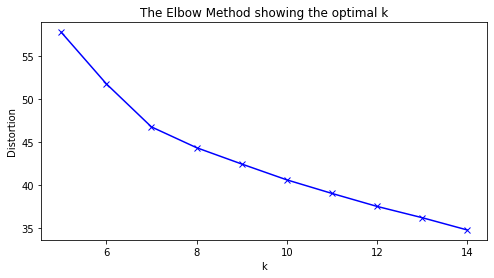

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(range(5,15), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [42]:
num_clusters = 7
test_model = KMeans(n_clusters=num_clusters)
test_model.fit(filt_df)
filt_df['Cluster'] = test_model.labels_
filt_df['Cluster'].value_counts()

3    412
1    402
2    367
5    354
0    300
6    261
4    200
Name: Cluster, dtype: int64

In [43]:
df['Cluster'] = test_model.labels_

In [55]:
for i in range(num_clusters):
    print("Cluster "+ str(i))
    print(list(df['Player'].loc[filt_df[filt_df['Cluster'] == i].head(15).index]))
    print()

Cluster 0
['Anthony Davis', 'Harrison Barnes', 'Serge Ibaka', 'Dirk Nowitzki', 'Ersan Ilyasova', 'Kelly Olynyk', 'Kristaps Porzingis', 'Myles Turner', 'Dario Saric', 'Boris Diaw', 'Luis Scola', 'Lauri Markkanen', 'Andrew Nicholson', 'Andrea Bargnani', 'Joffrey Lauvergne']

Cluster 1
['Kevin Durant', 'Giannis Antetokounmpo', 'Klay Thompson', 'Carmelo Anthony', 'Khris Middleton', 'Rudy Gay', 'Bojan Bogdanovic', 'Marco Belinelli', 'Buddy Hield', 'Danilo Gallinari', 'Mario Hezonja', 'Leandro Barbosa', 'Cedi Osman', 'Bojan Bogdanovic', 'Nicolas Batum']

Cluster 2
['Kemba Walker', 'Kyrie Irving', 'Goran Dragic', 'Dennis Schroder', 'Ricky Rubio', 'Tony Parker', 'Derrick Rose', 'Cory Joseph', 'Donovan Mitchell', 'Matthew Dellavedova', 'J.J. Barea', 'Luka Doncic', 'Frank Ntilikina', 'Pablo Prigioni', 'Kendall Marshall']

Cluster 3
['James Harden', 'DeMar DeRozan', 'Stephen Curry', 'Kyle Lowry', 'Paul George', 'Jimmy Butler', 'Andrew Wiggins', 'Nicolas Batum', 'Evan Fournier', 'Joe Ingles', 'Man

In [45]:
filt_df.groupby('Cluster').mean()

,% P&R Ball Handler,% Spot-Up,% Transition,% ISO,% Post-Up,% P&R Roll Man,% Cut,% Offensive Rebound,% Off Screen,% Hand Off
Cluster,,,,,,,,,,
0,0.020080,0.250238,0.109212,0.053111,0.150097,0.131104,0.112577,0.137590,0.026617,0.009372
1,0.228358,0.247098,0.178156,0.073313,0.025603,0.006045,0.043316,0.059344,0.088705,0.050061
2,0.602623,0.120243,0.093830,0.081426,0.004219,0.000545,0.013095,0.029760,0.022419,0.031838
3,0.425056,0.181955,0.137770,0.083817,0.013274,0.001606,0.027624,0.046259,0.044391,0.038249
4,0.003838,0.082352,0.065061,0.032017,0.356926,0.137628,0.143162,0.168395,0.008519,0.002102
5,0.077976,0.381222,0.166869,0.037926,0.034387,0.033488,0.070911,0.105822,0.059232,0.032167
6,0.004074,0.076636,0.080813,0.022122,0.126755,0.186795,0.224769,0.270755,0.004514,0.002766


In [46]:
s = df['Player'].value_counts()
names_to_keep = s[s >= 2].index

filt_df = df[df['Player'].isin(names_to_keep)]

nba_df = filt_df[filt_df['Source'] == 'NBA'].sort_values('Player')
fiba_df = filt_df[filt_df['Source'] == 'FIBA'].sort_values('Player')
if False in nba_df['Player'].values == fiba_df['Player'].values:
    print("Some names do not match!")
else:
    print("All names match! Ready to create confusion matrix.")

All names match! Ready to create confusion matrix.


In [49]:
fiba_df.shape

(164, 25)

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(nba_df['Cluster'].values, fiba_df['Cluster'].values)
pd.DataFrame(cm)

,0,1,2,3,4,5,6
0,13,0,0,0,4,1,5
1,4,13,3,2,1,2,0
2,0,1,18,10,0,0,0
3,0,9,3,12,0,0,0
4,1,0,0,0,8,0,1
5,5,9,0,0,0,9,0
6,2,0,0,0,12,0,16


In [54]:
import numpy as np
sum(np.diag(cm))/sum(sum(cm))

0.5426829268292683

In [60]:
fiba_df[['% ' + p for p in play_types]].mean()

% P&R Ball Handler     0.202813
% Spot-Up              0.166301
% Transition           0.119805
% ISO                  0.069373
% Post-Up              0.115954
% P&R Roll Man         0.067716
% Cut                  0.087666
% Offensive Rebound    0.106358
% Off Screen           0.043414
% Hand Off             0.020601
dtype: float64

In [61]:
nba_df[['% ' + p for p in play_types]].mean()

% P&R Ball Handler     0.220353
% Spot-Up              0.178930
% Transition           0.110556
% ISO                  0.057706
% Post-Up              0.078116
% P&R Roll Man         0.083510
% Cut                  0.084898
% Offensive Rebound    0.109814
% Off Screen           0.043644
% Hand Off             0.032472
dtype: float64

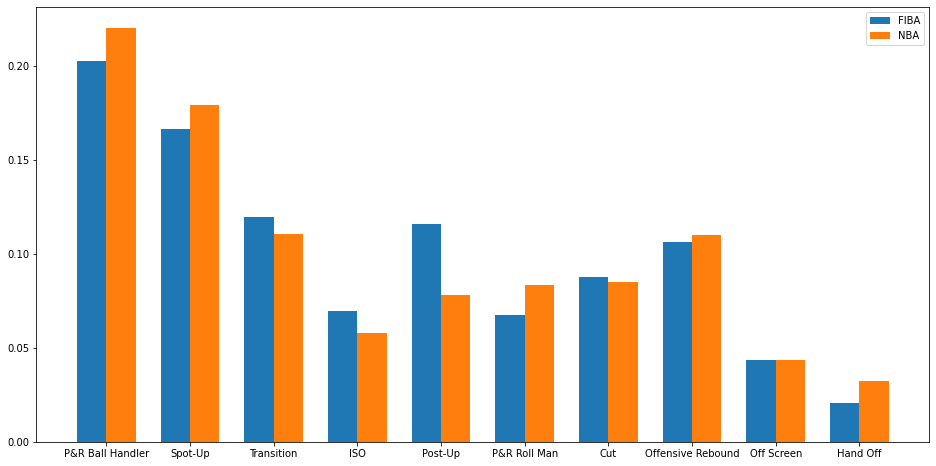

In [75]:
plt.figure(figsize = (16,8))
plt.bar([i for i in range(10)], fiba_df[['% ' + p for p in play_types]].mean(), width = 0.35, label = 'FIBA')
plt.bar([i+0.35 for i in range(10)], nba_df[['% ' + p for p in play_types]].mean(), width = 0.35, label = 'NBA')
plt.xticks([i+0.175 for i in range(10)], play_types)
plt.legend()
plt.show()